In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

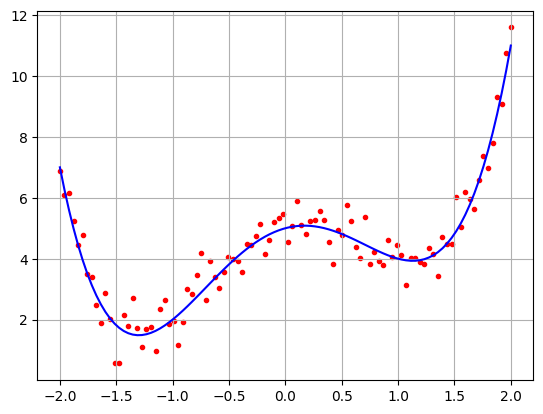

In [2]:
# generation of synthetic dataset

N = 100
x = np.linspace(-2, 2, N)
y = x ** 2 - 3
noise = np.random.normal(0, .5, N)

# original function
y0 = x**4 - 3* x**2 +x + 5

# "real data"
y = y0 + noise

plt.grid()
plt.scatter(x, y, marker = '.', color = 'r')
plt.plot(x, y0, color='b')

In [3]:
# Reshape for sklearn
x = x.reshape(-1, 1)

In [4]:
# Polynomial regression (degree=4, since the true function is quartic)
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(x, y)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,4
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [5]:
x_fit = np.linspace(-2, 2, 200).reshape(-1, 1)
y_fit = model.predict(x_fit)

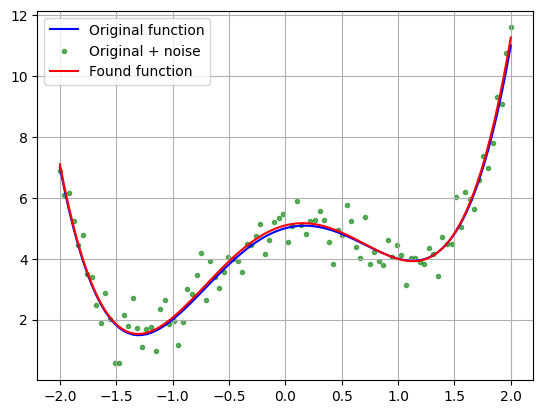

In [6]:
plt.grid()
plt.plot(x, y0, "b", label="Original function")
plt.scatter(x, y, color="g", marker =".", label="Original + noise", alpha=0.6)
plt.plot(x_fit, y_fit, "r", label="Found function")
plt.legend()

In [7]:
# accessing arguments found
linreg = model.named_steps["linearregression"]

In [8]:
# coefficients
linreg.coef_

array([ 0.        ,  0.93722054, -3.09395376,  0.02610395,  1.02883845])

In [9]:
# shift
linreg.intercept_

np.float64(5.09448794539587)

In [10]:
all = np.hstack(([linreg.intercept_], linreg.coef_[1:]))
all
#           5     +       x          + x^2    +    x^3     +    x^4

array([ 5.09448795,  0.93722054, -3.09395376,  0.02610395,  1.02883845])